In [4]:
import networkx as nx
import pandas as pd

In [5]:
dirname = 'data/competition-output/phase2-final/rcc-03/raw_results/holdout/output/'
filename = 'data_set_citations.json'

In [6]:
df = pd.read_json(dirname+filename)
df['data_set_id'] = ['data_'+str(i) for i in df['data_set_id']]
df['publication_id'] = ['pub_'+str(i) for i in df['publication_id']]
df = df.drop('mention_list', axis=1)
df.head()

,data_set_id,publication_id,score
0,data_305,pub_103,0.264053
1,data_306,pub_103,0.429020
2,data_320,pub_103,0.374938
3,data_306,pub_104,0.293487
4,data_306,pub_106,0.343932


In [7]:
G = nx.Graph()
G.add_weighted_edges_from(df.values.tolist())

In [8]:
df.values.tolist()

[['data_305', 'pub_103', 0.264052808284759],
 ['data_306', 'pub_103', 0.42902028560638406],
 ['data_320', 'pub_103', 0.374938279390335],
 ['data_306', 'pub_104', 0.29348674416542003],
 ['data_306', 'pub_106', 0.34393233060836703],
 ['data_306', 'pub_107', 0.257121056318283],
 ['data_320', 'pub_108', 0.353799879550933],
 ['data_305', 'pub_112', 0.319288730621337],
 ['data_306', 'pub_112', 0.28368371725082403],
 ['data_306', 'pub_113', 0.426553755998611],
 ['data_1283', 'pub_113', 0.39935210347175604],
 ['data_1286', 'pub_113', 0.25969511270523005],
 ['data_330', 'pub_114', 0.381737142801284],
 ['data_306', 'pub_117', 0.40131342411041204],
 ['data_1283', 'pub_117', 0.431325316429138],
 ['data_339', 'pub_121', 0.5895591378211971],
 ['data_1283', 'pub_121', 0.41467073559761003],
 ['data_305', 'pub_129', 0.30530393123626703],
 ['data_305', 'pub_130', 0.693672776222229],
 ['data_312', 'pub_130', 0.29542583227157504],
 ['data_320', 'pub_130', 0.497418105602264],
 ['data_1283', 'pub_130', 0.47

In [9]:
dirname = 'data/competition-output/phase2-final/rcc-03/raw_results/holdout/output/'
filename = 'research_fields.json'

In [10]:
df_rf = pd.read_json(dirname+filename)
# df_rf['data_set_id'] = ['data_'+str(i) for i in df_rf['data_set_id']]
df_rf['publication_id'] = ['pub_'+str(i) for i in df_rf['publication_id']]
# df_rf = df_rf.drop('mention_list', axis=1)
df_rf.head(15)

,publication_id,research_field,score
0,pub_102,business:finance,0.96
1,pub_103,economics:finance,0.82
2,pub_104,economics:finance,0.97
3,pub_106,economics:finance,0.97
4,pub_107,business:finance,0.91
5,pub_108,business:finance,0.76
6,pub_112,business:finance,0.79
7,pub_113,economics:finance,0.81
8,pub_114,sociology:finance,0.74
9,pub_117,economics:finance,0.77


In [11]:
set(df_rf.research_field)

{'business',
 'business:criminology',
 'business:education',
 'business:finance',
 'business:healthcare',
 'business:welfare',
 'economics',
 'economics:agriculture',
 'economics:criminology',
 'economics:education',
 'economics:finance',
 'economics:healthcare',
 'economics:welfare',
 'medicine:criminology',
 'medicine:education',
 'medicine:finance',
 'medicine:healthcare',
 'sociology',
 'sociology:agriculture',
 'sociology:criminology',
 'sociology:education',
 'sociology:finance',
 'sociology:healthcare',
 'sociology:welfare'}

In [12]:
from networkx.algorithms.connectivity import local_node_connectivity

## examples if it's cut off. 
local_node_connectivity(G, 'data_306', 'pub_103')

3

In [13]:
G.add_weighted_edges_from(df_rf.values.tolist())

In [18]:
dataset_degrees = []
dataset_degrees_dict = {}
for dataset in df.data_set_id:
    degree = G.degree(dataset)
    dataset_degrees.append(degree)
    dataset_degrees_dict[dataset] = degree

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Dataset Nodes Degree Distribution')

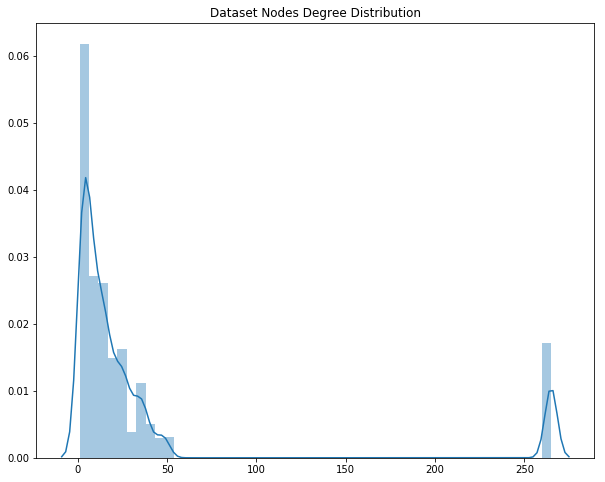

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(dataset_degrees, hist = True)
plt.title('Dataset Nodes Degree Distribution')

Text(0.5, 1.0, 'Dataset Nodes Degree Distribution')

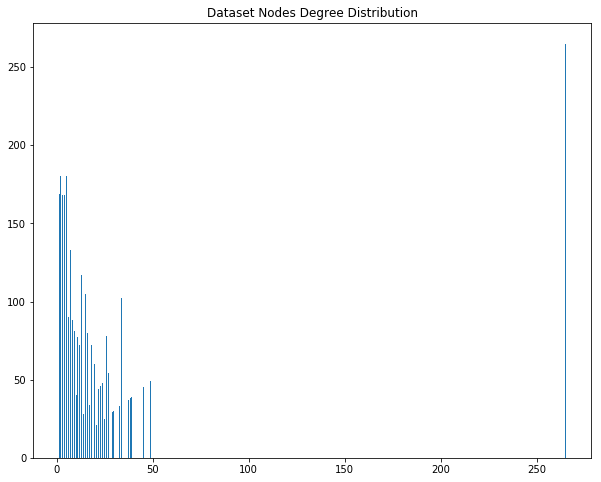

In [21]:
plt.figure(figsize=(10,8))
plt.hist(dataset_degrees, bins = 500)
plt.title('Dataset Nodes Degree Distribution')

In [22]:
sorted(dataset_degrees_dict.keys(), key = lambda x: dataset_degrees_dict[x])

['data_1282',
 'data_324',
 'data_370',
 'data_374',
 'data_42',
 'data_831',
 'data_1332',
 'data_72',
 'data_78',
 'data_82',
 'data_143',
 'data_148',
 'data_887',
 'data_888',
 'data_833',
 'data_421',
 'data_1231',
 'data_391',
 'data_395',
 'data_1081',
 'data_1082',
 'data_261',
 'data_136',
 'data_258',
 'data_259',
 'data_1499',
 'data_737',
 'data_625',
 'data_621',
 'data_623',
 'data_624',
 'data_629',
 'data_59',
 'data_101',
 'data_102',
 'data_103',
 'data_44',
 'data_794',
 'data_1077',
 'data_4745',
 'data_768',
 'data_1254',
 'data_696',
 'data_697',
 'data_698',
 'data_701',
 'data_504',
 'data_649',
 'data_836',
 'data_989',
 'data_1083',
 'data_1086',
 'data_1087',
 'data_800',
 'data_535',
 'data_1079',
 'data_1170',
 'data_687',
 'data_688',
 'data_691',
 'data_152',
 'data_845',
 'data_931',
 'data_2301',
 'data_55',
 'data_56',
 'data_57',
 'data_58',
 'data_62',
 'data_65',
 'data_66',
 'data_536',
 'data_968',
 'data_969',
 'data_970',
 'data_971',
 'data_972

In [23]:
dataset_degrees_dict['data_324']

1

In [24]:
(df.data_set_id=='data_438').sum()

265

In [25]:
df.data_set_id.unique().size

521

In [61]:
G.neighbors('business:finance')

['pub_102',
 'pub_107',
 'pub_108',
 'pub_112',
 'pub_118',
 'pub_121',
 'pub_135',
 'pub_138',
 'pub_139',
 'pub_140',
 'pub_151',
 'pub_157',
 'pub_159',
 'pub_161',
 'pub_162',
 'pub_2831',
 'pub_2833',
 'pub_2837',
 'pub_2851',
 'pub_2858',
 'pub_2867',
 'pub_2891',
 'pub_2895',
 'pub_2897',
 'pub_2899',
 'pub_2919',
 'pub_2921',
 'pub_2940',
 'pub_2952',
 'pub_3161',
 'pub_5721',
 'pub_5724',
 'pub_5734',
 'pub_5740',
 'pub_5742',
 'pub_5749',
 'pub_5763',
 'pub_5769',
 'pub_5783',
 'pub_5794',
 'pub_5800',
 'pub_5808',
 'pub_5809',
 'pub_5813',
 'pub_5822',
 'pub_5841',
 'pub_5852',
 'pub_5866',
 'pub_5872',
 'pub_5874',
 'pub_5879',
 'pub_5887',
 'pub_5889',
 'pub_5890',
 'pub_5891',
 'pub_5896',
 'pub_5902',
 'pub_5909',
 'pub_5911',
 'pub_5918',
 'pub_5928',
 'pub_5934',
 'pub_5939',
 'pub_5940',
 'pub_5943',
 'pub_5955',
 'pub_5964',
 'pub_5984',
 'pub_6010',
 'pub_6014',
 'pub_6015',
 'pub_6035',
 'pub_6075',
 'pub_6085',
 'pub_6087',
 'pub_6091',
 'pub_6108',
 'pub_6110',
 

In [27]:
df_rf.research_field.unique().size

24

In [28]:
df_rf.head()

,publication_id,research_field,score
0,pub_102,business:finance,0.96
1,pub_103,economics:finance,0.82
2,pub_104,economics:finance,0.97
3,pub_106,economics:finance,0.97
4,pub_107,business:finance,0.91


In [30]:
#Get research field to publications from df_rf
#then map datasets to research fields 
rf = sorted(df_rf.research_field.unique())
rf_data_dict = {}
for field in rf:
    pubs = df_rf[df_rf.research_field == field].publication_id
    data_set = set()
    for pub in pubs:
        data = df[df.publication_id == pub].data_set_id
        for x in data:
            data_set.add(x)
    rf_data_dict[field] = data_set

In [31]:
[]+['data_429', 'data_545'] + ['data_1293']+['data_868', 'data_570', 'data_847', 'data_204']

['data_429',
 'data_545',
 'data_1293',
 'data_868',
 'data_570',
 'data_847',
 'data_204']

In [32]:
a = set()
a.add(('data_429',
 'data_545',
 'data_1293',
 'data_868',
 'data_570',
 'data_847',
 'data_204'))
a

{('data_429',
  'data_545',
  'data_1293',
  'data_868',
  'data_570',
  'data_847',
  'data_204')}

In [36]:
rf_data_dict_count = {}
for key in rf_data_dict.keys():
    rf_data_dict_count[key] = len(rf_data_dict[key])

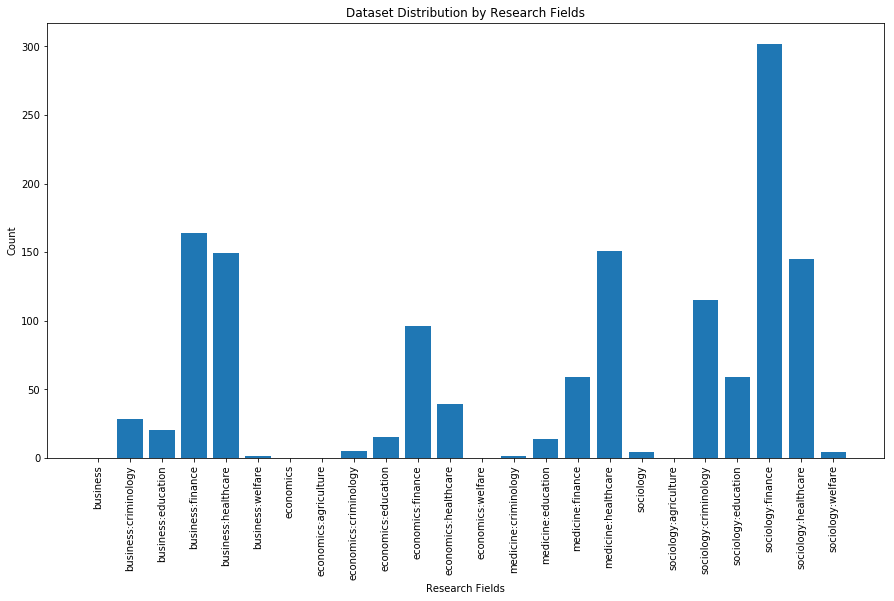

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 8))
plt.bar(range(len(rf_data_dict_count)), list(rf_data_dict_count.values()), align='center')
plt.xticks(range(len(rf_data_dict_count)), list(rf_data_dict_count.keys()), rotation = 90)
plt.xlabel('Research Fields')
plt.ylabel('Count')
plt.title('Dataset Distribution by Research Fields')
plt.show()

In [42]:
sum(rf_data_dict_count.values())

1371

In [43]:
df.data_set_id.unique().shape

(521,)

In [57]:
randomseed = 4
pos = nx.spring_layout(G, seed = randomseed)

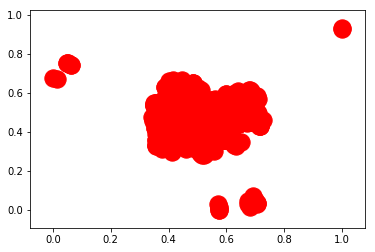

In [56]:
nx.draw_networkx_nodes(G, pos = nx.spring_layout(G))

In [62]:
df_rf.head()

,publication_id,research_field,score
0,pub_102,business:finance,0.96
1,pub_103,economics:finance,0.82
2,pub_104,economics:finance,0.97
3,pub_106,economics:finance,0.97
4,pub_107,business:finance,0.91


In [74]:
for v in dataset_nodes:
    print(v)

['data_305' 'data_306' 'data_320' 'data_1283' 'data_1286' 'data_330'
 'data_339' 'data_312' 'data_364' 'data_337' 'data_1282' 'data_331'
 'data_324' 'data_375' 'data_370' 'data_374' 'data_379' 'data_380'
 'data_400' 'data_39' 'data_1135' 'data_204' 'data_92' 'data_401'
 'data_480' 'data_42' 'data_831' 'data_826' 'data_961' 'data_1332'
 'data_398' 'data_928' 'data_1206' 'data_1253' 'data_72' 'data_1232'
 'data_396' 'data_455' 'data_714' 'data_406' 'data_832' 'data_94'
 'data_545' 'data_1007' 'data_377' 'data_137' 'data_491' 'data_509'
 'data_510' 'data_518' 'data_78' 'data_82' 'data_450' 'data_1295'
 'data_68' 'data_143' 'data_148' 'data_150' 'data_757' 'data_887'
 'data_888' 'data_429' 'data_139' 'data_399' 'data_891' 'data_1297'
 'data_833' 'data_488' 'data_444' 'data_476' 'data_477' 'data_527'
 'data_421' 'data_753' 'data_464' 'data_520' 'data_1177' 'data_430'
 'data_468' 'data_469' 'data_1037' 'data_45' 'data_1231' 'data_391'
 'data_395' 'data_422' 'data_46' 'data_50' 'data_51' 'dat

In [75]:
dataset_nodes = df.data_set_id.unique()

[pos[v] for v in dataset_nodes]

[array([0.5469154, 0.5406174], dtype=float32),
 array([0.559561 , 0.5429976], dtype=float32),
 array([0.5428692, 0.5400095], dtype=float32),
 array([0.54916966, 0.54645604], dtype=float32),
 array([0.57412344, 0.53260386], dtype=float32),
 array([0.6147089 , 0.45328078], dtype=float32),
 array([0.5389778, 0.5473659], dtype=float32),
 array([0.60670125, 0.5382493 ], dtype=float32),
 array([0.6102474 , 0.53769183], dtype=float32),
 array([0.6640217, 0.537112 ], dtype=float32),
 array([0.7051374, 0.5136497], dtype=float32),
 array([0.4320903, 0.5599157], dtype=float32),
 array([0.6440123, 0.5461809], dtype=float32),
 array([0.6254497, 0.5404177], dtype=float32),
 array([0.580154  , 0.45869184], dtype=float32),
 array([0.633112  , 0.54771066], dtype=float32),
 array([0.57211554, 0.69278526], dtype=float32),
 array([0.5698085, 0.6957829], dtype=float32),
 array([0.5787997 , 0.66351026], dtype=float32),
 array([0.51876575, 0.50135255], dtype=float32),
 array([0.51027477, 0.57533324], dtype=f

AttributeError: module 'matplotlib.cbook' has no attribute 'is_string_like'

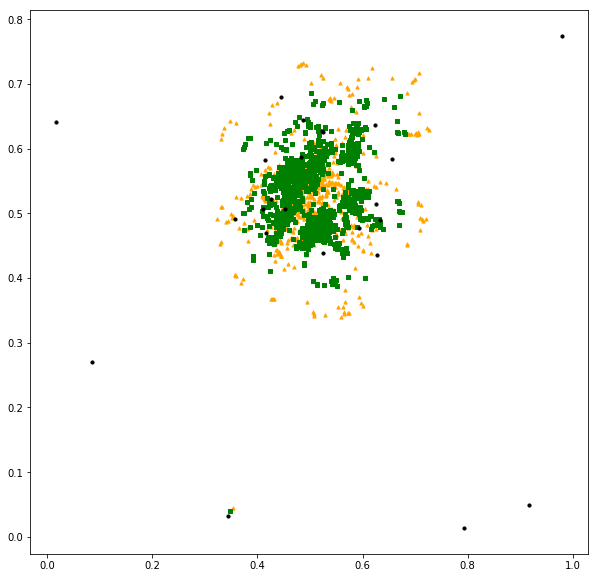

In [84]:
from matplotlib.patches import ConnectionStyle
import numpy as np
plt.figure(figsize=(10,10))

dataset_nodes = set(df.data_set_id)
pub_nodes = set(df.publication_id)
rf_nodes = set(df_rf.research_field)

nx.draw_networkx_nodes(G, nodelist = dataset_nodes, node_shape = '^', node_color = 'orange', node_size = 10, pos=pos, with_labels = False, label = 'Dataetsets')
nx.draw_networkx_nodes(G, nodelist = pub_nodes, node_shape = 's', node_color = 'green', node_size = 10, pos=pos, with_labels = False, label = 'Publications')
nx.draw_networkx_nodes(G, nodelist = rf_nodes, node_shape = 'o', node_color = 'black', node_size = 10, pos=pos, with_labels = False, label = 'Research Fields')
# # nx.draw_networkx_labels(nx.Graph(label_pos), pos=label_pos)
nx.draw_networkx_edges(G, pos=pos)


plt.legend()